## I. Data generation functions 

Code for generating data according to logistic regression model

* The binary data matrix X is generated randomly 
* The target vector y is generated according to logit model

We generate two types of data matices:

* compact matrices where all features are needed for prediction
* matrices with extra columns that do not contain any information for prediction

**Random functions** 

In [5]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
from pandas import IndexSlice
import numpy as np
import numpy.random as random
from convenience import *
from typing import List

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def logit(x:Series, w:Series):
    """
    Labels output according to logit model pr[y=1| sigmoid(w*x)]
    
    You can omit trailing zeroes in w by specifying only first non-zero coefficients  
    """
    return random.rand() <= sigmoid(np.dot(x.iloc[0:len(w)] - 0.5, w))

**Data generation**

In [7]:
def data_sampler(n:int, k:int,  f:callable) -> DataFrame:
    """
    Data generator that generates n x k feature matrix and a target vector
    
    Returns a data frame with columns x_1, ..., x_k, y where y is computed
    using ramdomised labelling function f.
    """
    
    columns = ['x_{}'.format(num) for num in range(1, k + 1)]
    return (DataFrame(random.rand(n, k), columns = columns)
            .transform(lambda x: x >= 0.5)
            .assign(y = lambda df: df.apply(f, axis=1)))

## II. Example datasets

* The size of the dataset and nature of the labelling function determines the hardness of the problem
* If labelling function is near-deterministic then there exist a good predictor
* If the number of features is small then it is easier to learn the function

###  Choosing among target function

* Lets build a target function that outputs `True` if at least one input is `True`
* The weights `w=[1,1]` achieve this but you will see that relation is not absolute
* Larger weights `[10, 10]` increase certainty and smaller weight `[0.1, 0.1]` decrease certainty

In [8]:
fs = lambda x: logit(x, Series([1, 1]))
X = data_sampler(1000, 2, fs)
X.head()

,x_1,x_2,y
0,False,False,False
1,False,True,False
2,True,True,True
3,False,True,True
4,True,True,True


Let see what is the fraction of `True` values for each input

In [9]:
S = X.groupby(['x_1', 'x_2']).aggregate(['count', 'sum'])
S.columns = S.columns.droplevel(0)  
S = S.assign(freq = lambda df: round(df['sum']/df['count'] * 100))
S.reset_index()

,x_1,x_2,count,sum,freq
0,False,False,262,69.0,26.0
1,False,True,257,126.0,49.0
2,True,False,224,126.0,56.0
3,True,True,257,186.0,72.0


The relation between inputs and outbut is not so clear:
* Lets experiment with different weights to see what happens
* For simplicity convert previous analysis to a function

In [10]:
def summarize(X:DataFrame) -> DataFrame:
    S = X.groupby(['x_1', 'x_2']).aggregate(['count', 'sum'])
    S.columns = S.columns.droplevel(0)  
    return (S.assign(freq = lambda df: round(df['sum']/df['count'] * 100)).
            reset_index())  
display(summarize(X))

,x_1,x_2,count,sum,freq
0,False,False,262,69.0,26.0
1,False,True,257,126.0,49.0
2,True,False,224,126.0,56.0
3,True,True,257,186.0,72.0


In [11]:
X = data_sampler(1000, 2, lambda x: logit(x, Series([10, 10])))
S1 = summarize(X)
X = data_sampler(1000, 2, lambda x: logit(x, Series([10, 10])))
S2 = summarize(X)
mdisplay([S1, S2], ['Sample 1', 'Sample 2'])

X = data_sampler(1000, 2, lambda x: logit(x, Series([0.1, 0.1])))
S1 = summarize(X)
X = data_sampler(1000, 2, lambda x: logit(x, Series([0.1, 0.1])))
S2 = summarize(X)
mdisplay([S1, S2], ['Sample 1', 'Sample 2'])

Sample 1 Sample 2 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 242 
 0.0 
 0.0 
 
 
 False 
 True 
 252 
 130.0 
 52.0 
 
 
 True 
 False 
 247 
 121.0 
 49.0 
 
 
 True 
 True 
 259 
 259.0 
 100.0 
 
 
 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 253 
 0.0 
 0.0 
 
 
 False 
 True 
 245 
 120.0 
 49.0 
 
 
 True 
 False 
 250 
 130.0 
 52.0 
 
 
 True 
 True 
 252 
 252.0 
 100.0

Sample 1 Sample 2 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 246 
 109.0 
 44.0 
 
 
 False 
 True 
 273 
 138.0 
 51.0 
 
 
 True 
 False 
 223 
 119.0 
 53.0 
 
 
 True 
 True 
 258 
 134.0 
 52.0 
 
 
 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 249 
 117.0 
 47.0 
 
 
 False 
 True 
 247 
 116.0 
 47.0 
 
 
 True 
 False 
 245 
 118.0 
 48.0 
 
 
 True 
 True 
 259 
 143.0 
 55.0

The number of samples is too small to get an accurate probability estimate
* Lets increase the number of samples

In [12]:
X = data_sampler(100000, 2, lambda x: logit(x, Series([10, 10])))
S1 = summarize(X)
X = data_sampler(100000, 2, lambda x: logit(x, Series([10, 10])))
S2 = summarize(X)
mdisplay([S1, S2], ['Sample 1', 'Sample 2'])

X = data_sampler(100000, 2, lambda x: logit(x, Series([0.1, 0.1])))
S1 = summarize(X)
X = data_sampler(100000, 2, lambda x: logit(x, Series([0.1, 0.1])))
S2 = summarize(X)
mdisplay([S1, S2], ['Sample 1', 'Sample 2'])

Sample 1 Sample 2 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 24887 
 0.0 
 0.0 
 
 
 False 
 True 
 25242 
 12618.0 
 50.0 
 
 
 True 
 False 
 24805 
 12394.0 
 50.0 
 
 
 True 
 True 
 25066 
 25065.0 
 100.0 
 
 
 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 25097 
 0.0 
 0.0 
 
 
 False 
 True 
 25285 
 12658.0 
 50.0 
 
 
 True 
 False 
 24810 
 12403.0 
 50.0 
 
 
 True 
 True 
 24808 
 24808.0 
 100.0

Sample 1 Sample 2 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 24974 
 11846.0 
 47.0 
 
 
 False 
 True 
 25033 
 12561.0 
 50.0 
 
 
 True 
 False 
 24981 
 12415.0 
 50.0 
 
 
 True 
 True 
 25012 
 13130.0 
 52.0 
 
 
 
 
 
 x_1 
 x_2 
 count 
 sum 
 freq 
 
 
 
 
 False 
 False 
 25119 
 11840.0 
 47.0 
 
 
 False 
 True 
 24926 
 12518.0 
 50.0 
 
 
 True 
 False 
 25059 
 12585.0 
 50.0 
 
 
 True 
 True 
 24896 
 13134.0 
 53.0

* Weight vector `w = [10,  10]`  creates predictable instances
* Weight vector `w = [0.1, 0.1]` creates almost unpredictable instances 

### Choosing learning tasks to compare

* Lets consider predictable and almost unpredictable labelling functions
* Lets consider with few and with many features

In [308]:
sampler_11 = lambda n: data_sampler(n, 2, lambda x: logit(x, Series([10, 10])))
sampler_10 = lambda n: data_sampler(n, 2, lambda x: logit(x, Series([0.1, 0.1])))
sampler_01 = lambda n: data_sampler(n, 15, lambda x: logit(x, Series([10, 10])))
sampler_00 = lambda n: data_sampler(n, 15, lambda x: logit(x, Series([0.1, 0.1])))

## III. Learning algorithms

* Lets observe the behaviour of several algorithms
  * Majority voting
  * Logistic regression
* Majority voting is the simplest and the best classification algorithm:
  * It is optimal if the number of samples is large enough to cover each possible input
  * It is theoretically optimal -- we cannot do better without extra knowledge about the data
* Logistic regression can work with fewer samples:
  * It makes extra assumptions about the labelling function
  * As a result there are fewer parameters to learn
  * The convergence to the final classification algoritm is faster  

###  Majority voting algorithm

* Our implementation corresponds to `sklearn` prediction API:
  * Constructor for fixing free hyperparamaters
  * Method `fit(samples, targets)` to train the model
  * Method `predict(samples)` to predict labels
  * Method `set_params(...)` to set hyperparamaters  

In [21]:
class MajorityVoting:
    
    def __init__(self, features:List[str]=None):
        if features:
            self.features = list(features)
        else:
            self.features = None
    
    def set_params(features: List[str]) -> None:
        self.features = features
    
    def fit(self, X: DataFrame, y: Series) -> None:
        
        if self.features is None:
            self.features = list(X.columns.values)

        data = X.assign(y = y)
        pred = data.groupby(self.features).aggregate(['count', 'sum'])
        pred.columns = pred.columns.droplevel(0)
        self.pred = DataFrame({'prediction':(pred['sum']/pred['count'] >= 0.5)})
    
    def predict(self, X: DataFrame) -> np.array:
        
        return (X[self.features]
                .join(self.pred, on=self.features, how='left')['prediction']
                .fillna(True)
                .values)

**Majority voting:** Example run

In [22]:
clf = MajorityVoting()
data = sampler_11(2)
features = list(data.columns.values)[0:-1]
clf.fit(data[features], data['y'])
mdisplay([data, clf.pred],['Data', 'Predictor'])
clf.predict(data[features])

Data Predictor 
 
 
 x_1 
 x_2 
 y 
 
 
 
 
 True 
 True 
 True 
 
 
 False 
 False 
 False 
 
 
 
 
 
 prediction 
 
 
 
 
 False 
 
 
 True

array([ True, False])

**Logistic regression:** Example run

In [23]:
from sklearn.linear_model import LogisticRegression
data = sampler_11(2)

clf = LogisticRegression(solver = 'lbfgs')
features = list(data.columns.values)[0:-1]
clf.fit(data[features], data['y'])
clf.predict(data[features])

array([False,  True])

## IV.  Accuracy and convergence

* Boo
* To eliminate fluctuations based on test data generation we use same testset for all training set sizes 

### Generation of training and test data

In [336]:
sizes = [10, 50, 100] + list(range(200, 1001, 100)) + list(range(2000, 5001, 1000))

train_00 = [sampler_00(n) for n in sizes]
features_00 = list(train_00[0].columns.values[0:-1])

train_01 = [sampler_01(n) for n in sizes]
features_01 = list(train_01[0].columns.values[0:-1])

train_10 = [sampler_10(n) for n in sizes]
features_10 = list(train_10[0].columns.values[0:-1])

train_11 = [sampler_11(n) for n in sizes]
features_11 = list(train_11[0].columns.values[0:-1])

n = 10000
test_00 = sampler_00(n)
test_01 = sampler_01(n)
test_10 = sampler_10(n)
test_11 = sampler_11(n)

### Majority Voting example  

It always easier to to the analysis for one dataset to work out the details

In [26]:
test = test_11
train = train_11[1]
clf = MajorityVoting(features_11)
clf.fit(train, train['y'])
display(clf.pred)

prediction
x_1   x_2              
False False       False
      True        False
True  False        True
      True         True

In [27]:
mdisplay([train.head(), DataFrame(clf.predict(train)).head()], ['Data', 'Prediction'])

Data Prediction 
 
 
 x_1 
 x_2 
 y 
 
 
 
 
 False 
 False 
 False 
 
 
 False 
 True 
 False 
 
 
 False 
 True 
 False 
 
 
 False 
 True 
 True 
 
 
 False 
 False 
 False 
 
 
 
 
 
 0 
 
 
 
 
 False 
 
 
 False 
 
 
 False 
 
 
 False 
 
 
 False

In [28]:
test_error = sum(test['y'] != clf.predict(test)) / len(test) * 100
training_error = sum(train['y'] != clf.predict(train)) / len(train) * 100
print('Training error: {tr}% \nTest error:     {te}%'.format(tr=round(training_error), te=round(test_error)))

Training error: 23% 
Test error:     25%


### Logistic regression example

In [29]:
test = test_11
train = train_11[1]
clf = LogisticRegression(solver = 'lbfgs')
clf.fit(train[features_11], train['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
test_error = sum(test['y'] != clf.predict(test[features_11])) / len(test) * 100
training_error = sum(train['y'] != clf.predict(train[features_11])) / len(train) * 100
print('Training error: {tr}% \nTest error:     {te}%'.format(tr=round(training_error), te=round(test_error)))

Training error: 23% 
Test error:     25%


### Complete analysis

Lets generate multi-indexed key-value dataframe for storing errors 

In [337]:
k = len(sizes)
df = (DataFrame(np.full([4 * k, 1], np.nan), columns = ['error'])
      .assign(method = ['MV'] * k * 2 + ['LR'] * k * 2)
      .assign(size = sizes * 4)
      .assign(type = ['train'] * k + ['test'] * k + ['train'] * k + ['test'] * k))

error = (pd.concat([
         df.assign(source = '00', fit = 'bad',  dim = 'large'),
         df.assign(source = '01', fit = 'good', dim = 'large'),
         df.assign(source = '10', fit = 'bad',  dim = 'small'),
         df.assign(source = '11', fit = 'good', dim = 'small')])
         .set_index(['method', 'size', 'type', 'source']))[['dim', 'fit', 'error']]

error = error.sort_index()
display(error.head())

dim   fit  error
method size type  source                    
LR     10   test  00      large   bad    NaN
                  01      large  good    NaN
                  10      small   bad    NaN
                  11      small  good    NaN
            train 00      large   bad    NaN

Iterate over all datasets and fill the table for majority voting

In [338]:
for i, size in enumerate(sizes):
    test = test_00
    train = train_00[i]
    clf = MajorityVoting(features_00)
    clf.fit(train, train['y'])
    error.loc[('MV',size,'test' ,'00'), 'error'] = sum(test['y'] != clf.predict(test)) / len(test) * 100
    error.loc[('MV',size,'train','00'), 'error'] = sum(train['y'] != clf.predict(train)) / len(train) * 100
    
    test = test_01
    train = train_01[i]
    clf = MajorityVoting(features_01)
    clf.fit(train, train['y'])
    error.loc[('MV',size,'test', '01'), 'error'] = sum(test['y'] != clf.predict(test)) / len(test) * 100
    error.loc[('MV',size,'train','01'), 'error'] = sum(train['y'] != clf.predict(train)) / len(train) * 100

    test = test_10
    train = train_10[i]
    clf = MajorityVoting(features_10)
    clf.fit(train, train['y'])
    error.loc[('MV',size,'test', '10'), 'error'] = sum(test['y'] != clf.predict(test)) / len(test) * 100
    error.loc[('MV',size,'train','10'), 'error'] = sum(train['y'] != clf.predict(train)) / len(train) * 100

    test = test_11
    train = train_11[i]
    clf = MajorityVoting(features_11)
    clf.fit(train, train['y'])
    error.loc[('MV',size,'test', '11'), 'error'] = sum(test['y'] != clf.predict(test)) / len(test) * 100
    error.loc[('MV',size,'train','11'), 'error'] = sum(train['y'] != clf.predict(train)) / len(train) * 100

display(error.loc['MV', 'error'].unstack())  

source             00         01         10         11
size type                                             
10   test   49.750000  50.070000  49.650000  24.830000
     train   0.000000   0.000000  40.000000  10.000000
50   test   49.780000  50.030000  50.490000  25.530000
     train   0.000000   0.000000  42.000000  20.000000
100  test   49.670000  50.010000  50.060000  24.350000
     train   0.000000   0.000000  43.000000  20.000000
200  test   49.730000  49.890000  48.330000  24.350000
     train   0.000000   0.000000  45.000000  20.500000
300  test   49.670000  49.730000  49.800000  24.350000
     train   0.666667   0.333333  41.333333  20.333333
400  test   49.720000  49.840000  48.330000  25.530000
     train   0.500000   0.000000  45.250000  24.500000
500  test   49.690000  49.610000  50.350000  24.830000
     train   0.000000   0.000000  48.000000  23.000000
600  test   49.730000  49.590000  48.760000  25.050000
     train   0.833333   0.000000  46.666667  22.000000
700  test   49.600000  49.370000  48.330000  24.350000
     train   0.285714   0.000000  46.857143  24.571429
800  test   49.680000  49.550000  51.240000  24.830000
     train   0.375000   0.375000  47.375000  23.000000
900  test   49.740000  49.590000  50.060000  24.350000
     train   0.555556   0.222222  49.000000  25.111111
1000 test   49.570000  49.450000  48.470000  25.050000
     train   0.800000   0.500000  46.600000  24.300000
2000 test   49.680000  48.880000  48.760000  24.830000
     train   1.100000   0.650000  48.500000  25.200000
3000 test   49.640000  47.870000  48.330000  24.830000
     train   1.800000   0.966667  48.100000  24.633333
4000 test   49.980000  47.360000  48.330000  24.350000
     train   2.650000   1.250000  48.225000  23.875000
5000 test   49.900000  46.820000  48.760000  25.530000
     train   3.240000   1.800000  46.820000  24.000000

In [339]:
for i, size in enumerate(sizes):
    test = test_00
    train = train_00[i]
    features = features_00 
    clf = LogisticRegression(solver = 'lbfgs')
    clf.fit(train[features], train['y'])    
    error.loc[('LR',size,'test', '00'), 'error'] = sum(test['y'] != clf.predict(test[features])) / len(test) * 100
    error.loc[('LR',size,'train','00'), 'error'] = sum(train['y'] != clf.predict(train[features])) / len(train) * 100

    test = test_01
    train = train_01[i]
    features = features_01 
    clf = LogisticRegression(solver = 'lbfgs')
    clf.fit(train[features], train['y'])    
    error.loc[('LR',size,'test', '01'), 'error'] = sum(test['y'] != clf.predict(test[features])) / len(test) * 100
    error.loc[('LR',size,'train','01'), 'error'] = sum(train['y'] != clf.predict(train[features])) / len(train) * 100

    test = test_10
    train = train_10[i]
    features = features_10 
    clf = LogisticRegression(solver = 'lbfgs')
    clf.fit(train[features], train['y'])    
    error.loc[('LR',size,'test', '10'), 'error'] = sum(test['y'] != clf.predict(test[features])) / len(test) * 100
    error.loc[('LR',size,'train','10'), 'error'] = sum(train['y'] != clf.predict(train[features])) / len(train) * 100

    test = test_11
    train = train_11[i]
    features = features_11 
    clf = LogisticRegression(solver = 'lbfgs')
    clf.fit(train[features], train['y'])    
    error.loc[('LR',size,'test', '11'), 'error'] = sum(test['y'] != clf.predict(test[features])) / len(test) * 100
    error.loc[('LR',size,'train','11'), 'error'] = sum(train['y'] != clf.predict(train[features])) / len(train) * 100

display(error.loc['LR', 'error'].unstack())

source             00         01         10         11
size type                                             
10   test   49.360000  37.040000  50.200000  24.830000
     train   0.000000   0.000000  40.000000  10.000000
50   test   50.130000  25.340000  50.490000  25.530000
     train  30.000000   6.000000  42.000000  20.000000
100  test   49.260000  25.170000  50.060000  24.350000
     train  37.000000  10.000000  43.000000  20.000000
200  test   49.170000  25.020000  48.330000  24.350000
     train  41.000000  17.000000  45.000000  20.500000
300  test   49.320000  25.190000  49.800000  24.350000
     train  37.333333  16.000000  41.333333  20.333333
400  test   50.200000  24.450000  48.330000  25.530000
     train  39.750000  17.250000  45.250000  24.500000
500  test   50.390000  24.270000  49.940000  24.830000
     train  41.200000  19.400000  49.800000  23.000000
600  test   49.280000  25.370000  48.760000  25.050000
     train  42.666667  21.833333  46.666667  22.000000
700  test   49.240000  24.920000  48.330000  24.350000
     train  43.142857  21.285714  46.857143  24.571429
800  test   49.270000  24.440000  51.240000  24.830000
     train  41.500000  23.875000  47.375000  23.000000
900  test   49.550000  24.480000  50.200000  24.350000
     train  43.333333  22.888889  49.111111  25.111111
1000 test   50.040000  25.100000  50.200000  25.050000
     train  44.900000  22.500000  47.000000  24.300000
2000 test   50.140000  25.140000  48.620000  25.530000
     train  46.600000  21.500000  48.600000  25.200000
3000 test   49.180000  25.330000  48.620000  24.830000
     train  46.200000  22.633333  48.233333  24.633333
4000 test   49.390000  25.460000  48.330000  24.350000
     train  47.500000  23.400000  48.225000  23.875000
5000 test   49.840000  24.890000  48.760000  25.530000
     train  47.340000  22.260000  46.820000  24.000000

Add accuracy for clarity and save the result

In [340]:
error = error.assign(error = lambda df: round(df['error'], 2), accuracy = lambda df: round(100 - df['error'], 2)).reset_index()
error.to_csv('convergence.csv', index = False)

### Displaying results

Lets draw faceted plots for showing large and small scale changes

Note that `seaborn.FacetGrid` provides three channels for spliting data:
* `col` -- into which column the data goes
* `ŗow` -- into which row the data goes
* `hue` -- how the data is colored in the graph

As we want to split data according to four categories:
* dataset dimensionality
* the type of labelling function
* machine learning method
* behaviour on test and train data
we must cheat and combine last two categories into single `hue` channel

To get desired visual separation we must manually control aestetics of four hue groups.
It is a bit hacky but we get the things done.

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# Manual control of hue groups
hue_order = ['LR-test', 'LR-train', 'MV-test', 'MV-train']
hue_kws = {'color':      ['blue', 'orange', 'blue', 'orange'], 
           'marker':     ['X', 'X', '.', '.'],
           'linestyle':  ['-', '-', '-.', '-.']
          }

#### Large-scale behaviour

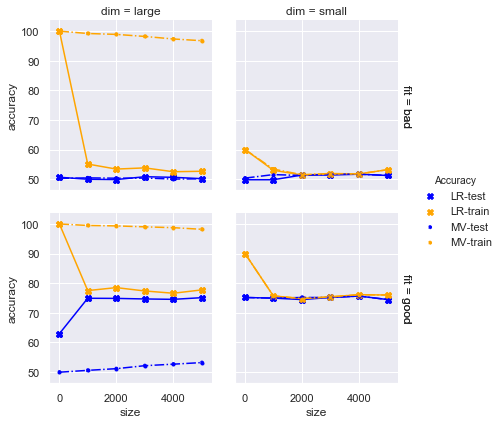

In [369]:
df = (error.loc[error['size'].isin([10, 1000, 2000, 3000, 4000, 5000]),:]
      .assign(hue = lambda df: combine_columns(df, ['method', 'type'], "-")))

fg = sns.FacetGrid(df, col="dim", row="fit", hue = "hue", 
                   hue_order=hue_order, hue_kws=hue_kws,
                   margin_titles = True)
fg.map(plt.plot, "size", "accuracy")
fg.map(plt.scatter, "size", "accuracy")
fg.add_legend(title = "Accuracy")

#### Small-scale behaviour

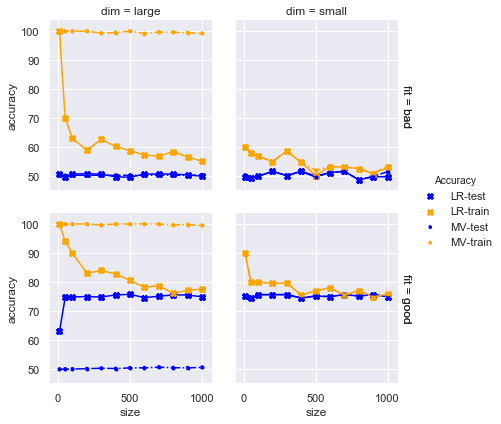

In [370]:
df = (error.loc[error['size'] <= 1000,:]
      .assign(hue = lambda df: combine_columns(df, ['method', 'type'], "-")))

fg = sns.FacetGrid(df, col="dim", row="fit", hue = "hue", 
                   hue_order=hue_order, hue_kws=hue_kws,
                   margin_titles = True)
fg.map(plt.plot, "size", "accuracy", marker ='s')
fg.map(plt.scatter, "size", "accuracy")
fg.add_legend(title = "Accuracy")

## Bias variance trade-off


In [ ]:
%config IPCompleter.greedy=True